# Построение управленческого дашборда для ритейл компании

Берем датасет отсюда, это база заказов онлайн магазина из Великобритании: https://docs.google.com/spreadsheets/d/1q3IQGwr79mfFMEVWAHqWiea06JB3E1vSj4iy7rR143Y/edit#gid=936717536 и копируем себе на Google Drive

Исследуем датасет на предмет качества, достаточности данных. Формулируем предположения о бизнес-задаче, которую можно решить с помощью предложенных данных, заказчиках/пользователях отчета, их ожиданиях, системе метрик на основании датасета.

Проводим анализ данных доступными инструментами (Excel, Python (если изучали до данного курса) и т.д.).
Строим дашборд (или макет дашборда, если на данный момент не изучили BI-инструменты) в доступном вам инструменте (Excel, Google Data Studio, Power BI и др.)


In [25]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузим данные и приведём их в удобный для анализа формат

In [26]:
df = pd.read_csv('OnlineRetail.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,"1,69",13047.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/10 8:34,"5,95",13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/10 8:34,"4,95",13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 9:02,"2,75",17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
54209,581585,84832,ZINC WILLIE WINKIE CANDLE STICK,24,12/9/11 12:31,"0,85",15804.0,United Kingdom
54210,581585,23084,RABBIT NIGHT LIGHT,12,12/9/11 12:31,"2,08",15804.0,United Kingdom
54211,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,12/9/11 12:31,"0,42",15804.0,United Kingdom
54212,581587,22631,CIRCUS PARADE LUNCH BOX,12,12/9/11 12:50,"1,95",12680.0,France


Таблица состоит из 8 столбцов, имеет 54214 строки. Содержит информацию о счетах на оплату, выставленных в онлайн-магазине (порядковый номер, коды товаров в счете, описание товаров и их количество, дата выставления счета, цена товаров, айди покупателя, которому выставлен счет, и страна покупателя).

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    54214 non-null  object 
 1   StockCode    54214 non-null  object 
 2   Description  54080 non-null  object 
 3   Quantity     54214 non-null  int64  
 4   InvoiceDate  54214 non-null  object 
 5   UnitPrice    54214 non-null  object 
 6   CustomerID   40643 non-null  float64
 7   Country      54214 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.3+ MB


In [28]:
df.describe()

,Quantity,CustomerID
count,54214.000000,40643.000000
mean,9.610802,15283.422803
std,57.358422,1707.982278
min,-9600.000000,12347.000000
25%,1.000000,13969.000000
50%,3.000000,15152.000000
75%,10.000000,16775.000000
max,2400.000000,18287.000000


Из описания можно заметить, что в каком-то из счетов на оплату отражено отрицательное количество товара. А также по столбцам Description и CustomerID есть пропуски. Проверим данные на наличие дублей.

In [29]:
df[df.duplicated(keep=False)]
df.shape

(54214, 8)

In [30]:
df.drop_duplicates(inplace=True)
df.shape

(54164, 8)

In [31]:
df = df[df.Quantity > 0] #удаляем отрицательные значения из столбца Quantity
df.shape

(53082, 8)

In [32]:
#Исправим типы данных в очищенном датасете
df.CustomerID = df.CustomerID.astype('int64', errors='ignore')
df.UnitPrice = df.UnitPrice.str.replace(',', '.').astype('float64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53082 entries, 0 to 54213
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    53082 non-null  object 
 1   StockCode    53082 non-null  object 
 2   Description  53032 non-null  object 
 3   Quantity     53082 non-null  int64  
 4   InvoiceDate  53082 non-null  object 
 5   UnitPrice    53082 non-null  float64
 6   CustomerID   39673 non-null  float64
 7   Country      53082 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.6+ MB


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [33]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], infer_datetime_format=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Проанализируем полученные данные

In [34]:
# Посчитаем сколько счетов на оплату было выставлено в разных странах
pd.DataFrame(df.Country.value_counts())

,Country
United Kingdom,48603
Germany,908
France,866
EIRE,758
Spain,251
Netherlands,232
Belgium,206
Switzerland,187
Portugal,151
Australia,123


Большинство стран - европейские. Российская Федерация отсутствует.

In [35]:
#посчитаем сколько заказов из разных стран поступило
countries = df.groupby(by=['Country']).InvoiceNo.nunique().sort_values(ascending=False)
pd.DataFrame(countries)

,InvoiceNo
Country,
United Kingdom,12580
Germany,323
France,297
EIRE,229
Belgium,81
Spain,70
Netherlands,61
Portugal,46
Switzerland,39


Больше всего заказов было сделано в Великобритании

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53082 entries, 0 to 54213
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    53082 non-null  object        
 1   StockCode    53082 non-null  object        
 2   Description  53032 non-null  object        
 3   Quantity     53082 non-null  int64         
 4   InvoiceDate  53082 non-null  datetime64[ns]
 5   UnitPrice    53082 non-null  float64       
 6   CustomerID   39673 non-null  float64       
 7   Country      53082 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 3.6+ MB


Мы имеем столбец с количеством проданных товаров 'Quantity' и столбец с ценой за единицу 'UnitPrice'. Отсюда мы можем получить сумму за товар. Запишем данные в новый столбец.

In [37]:
df['Summ'] = df['Quantity'] * df['UnitPrice']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
#теперь добавим месяц покупки и день недели, тоже в новые столбцы, они пригодятся для дальнейшего анализа
df['Month'] = df['InvoiceDate'].dt.strftime('%Y-%m') 
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Summ,Month,DayOfWeek
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,Wednesday
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010-12,Wednesday
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom,17.85,2010-12,Wednesday
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047.0,United Kingdom,14.85,2010-12,Wednesday
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850.0,United Kingdom,22.00,2010-12,Wednesday


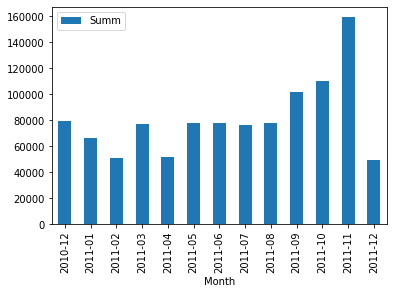

In [40]:
#построим график выручки по месяцам
df.groupby(['Month'])[['Summ']].sum().plot(kind='bar')

Из графика видно, что самыми прибыльными месяцами стали сентябрь, октябрь и ноябрь 2011 года. Резкий спад в декабре 2011 года объясняется недостатком данных, они обрываются на 9 декабря 2011.

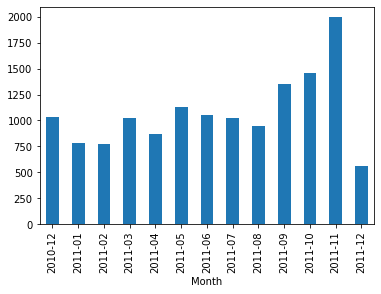

In [41]:
#посмотрим количество заказов по месяцам
SalesByMonth = df.groupby(by=['Month']).InvoiceNo.nunique().plot(kind='bar')

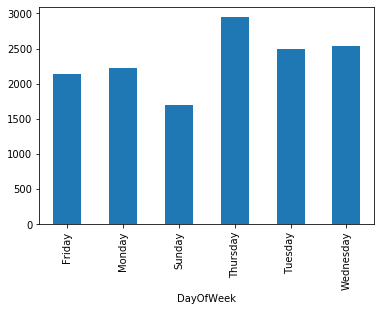

In [42]:
#посмотрим количество заказов по дням недели
SalesByDay = df.groupby(by=['DayOfWeek']).InvoiceNo.nunique().plot(kind='bar')

Самые популярные дни для заказов: четверг, среда и вторник. В субботу заказы не делаются совсем. Очень мало продаж в воскресенье.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

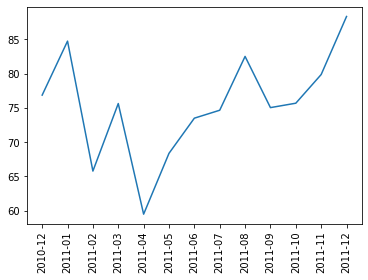

In [43]:
#посмотрим средний чек по месяцам
avgcheck = df.groupby(df['Month'])['Summ'].sum().divide(df.groupby(df['Month'])['InvoiceNo'].nunique())
plot = sns.lineplot(data=avgcheck)
plt.xticks(rotation='vertical')


Самый большой средний чек был в декабре 2011 года, а самый маленький - в апреле 2011. Необходимо дополнительно смотреть, с чем это было связано. К сожалению, мы не имеем данной информации.

In [44]:
#теперь посмотрим LTV (сколько денег потратил каждый клиент за все время)
ltv = df.groupby(df['CustomerID'])['Summ'].sum().sort_values(ascending=False)
ltv.head(10)

CustomerID
18102.0    26533.44
14646.0    25519.16
17450.0    23000.10
12415.0    16102.89
14911.0    15238.45
14156.0    12092.71
17949.0    12048.08
17511.0     9534.21
14096.0     8487.80
15769.0     8129.04
Name: Summ, dtype: float64

Мы получили топ-10 клиентов, которые потратили в данном интернет-магазине наибольшее количество денег за год.